In [1]:
%load_ext autoreload
%autoreload 2

import ncem

import matplotlib.pyplot as plt
import scanpy as sc
import numpy as np
from scipy.stats import ttest_rel, ttest_ind

usr = !echo $USER
grid_search_dir = '.'
datadir = '.'

 # Interaction model

 ## Figure 1 (d): Modeling cell communication as spatial cell state dependencies.

210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation
210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 8 runs with 3-fold cross validation
210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['INTERACTIONS_MAX_NODES_PATIENT_1'], given was ['INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1']


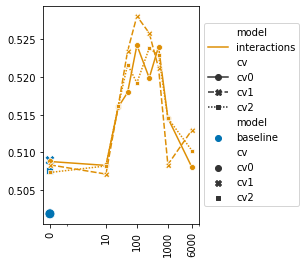

In [2]:
gs_linear = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG",
        "210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
        "210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_linear.load_gs()

gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_MAX_NODES_PATIENT_1": "interactions",
            "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1": "baseline",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "interactions": "C1"},
    xticks=[0, 10, 100, 1000, 6000],
)

## Paired t-test between baseline model and best spatial model

In [3]:
test_id_interaction = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_PATIENT_1")],
)
interaction_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_interaction]['test_r_squared_linreg']
)
test_id_baseline = gs_linear.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1")],
)
baseline_test_r2 = np.array(
    gs_linear.summary_table[gs_linear.summary_table["run_id"] ==test_id_baseline]['test_r_squared_linreg']
)

print(ttest_rel(interaction_test_r2, baseline_test_r2))

Ttest_relResult(statistic=5.600937564995256, pvalue=0.030429565025988266)


## Supp. Fig. 4 (a): Length scales of dependencies for different target cell-types.

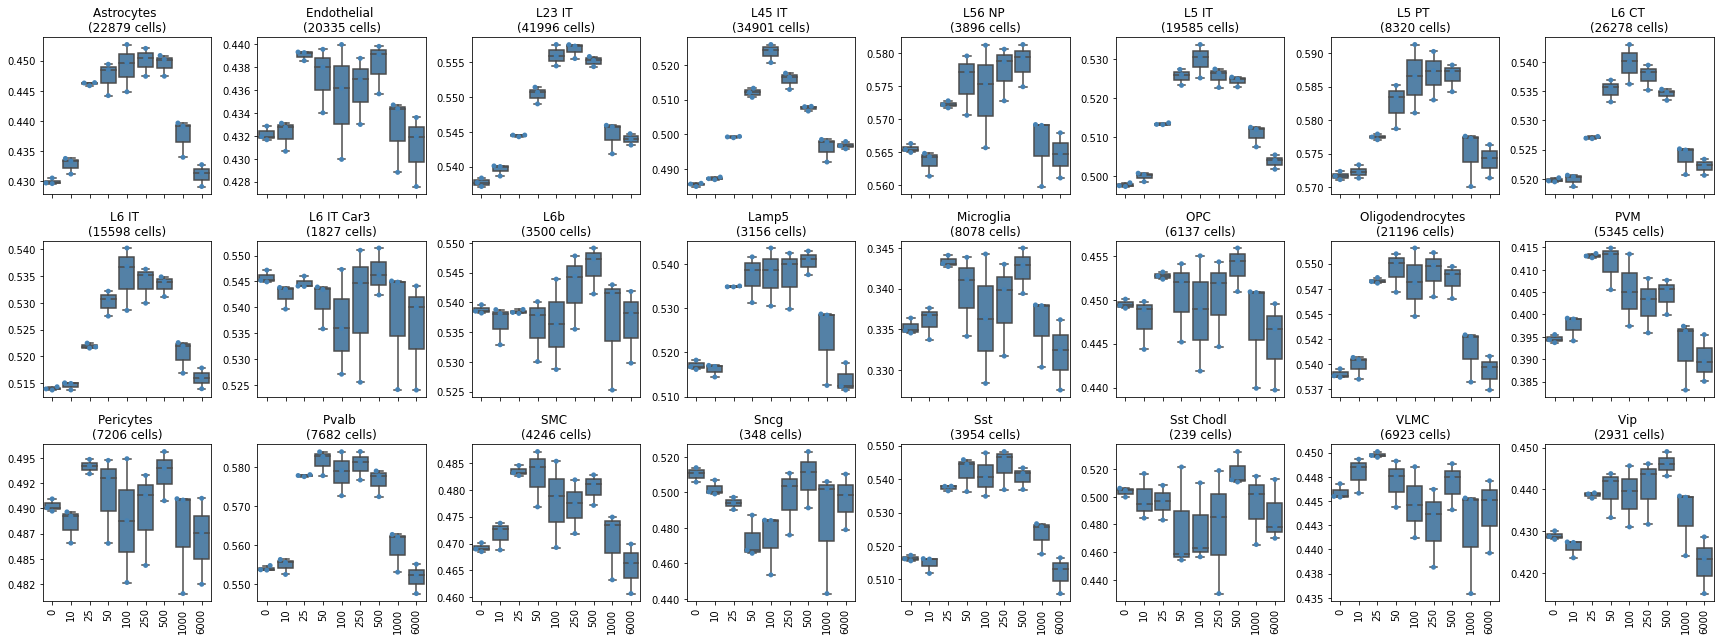

In [4]:
gs_linear.load_target_cell_evaluation()

gs_linear.target_cell_table = gs_linear.target_cell_table[gs_linear.target_cell_table['target_cell'] != 'other']
gs_linear.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

## Interpreter

In [5]:
clm = ncem.interpretation.InterpreterInteraction()
clm.load_model(
    results_path=grid_search_dir,
    gs_id="210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
    cv_idx=0,
    model_id=test_id_interaction,
)
clm.get_data_again(data_path=datadir + "zhang/", data_origin="zhang")
clm.split_data_byidx_again(cv_idx=0)
clm.init_model_again()
clm.load_weights_again()

clm.reinitialize_model(changed_model_kwargs={'input_shapes': (25, 254, 625, 1, 0, 2)})

210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 8 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210511_interactions_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecTrue_bs0_md4_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata
collecting image-wise celldata


  0%|          | 0/64 [00:00<?, ?it/s]

adding graph-level covariates


100%|██████████| 64/64 [00:05<00:00, 11.39it/s]


Loaded 64 images with complete data from 2 patients over 280327 cells with 254 cell features and 25 distinct celltypes.
Mean of mean node degree per images across images: 40.670611
cross-validation selected: cv0
setting reinitialized layer weights to layer weights from model 210511_interactions_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecTrue_bs0_md4_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21


In [6]:
lm = ncem.interpretation.InterpreterInteraction()
lm.load_model(
    results_path=grid_search_dir,
    gs_id="210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG",
    cv_idx=0,
)
lm.get_data_again(data_path=datadir + "zhang/", data_origin="zhang")
lm.split_data_byidx_again(cv_idx=0)
lm.init_model_again()
lm.load_weights_again()

lm.reinitialize_model(changed_model_kwargs={'input_shapes': (25, 254, 625, 1, 0, 2)})

210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation
cross-validation selected: cv0
loaded model 210511_interactions_baseline_none_nodes_patient_1_zhang_adam_lr1_agrFalse_predecTrue_bs0_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21
Loading data from raw files
registering celldata
collecting image-wise celldata


  5%|▍         | 3/64 [00:00<00:02, 24.53it/s]

adding graph-level covariates


100%|██████████| 64/64 [00:04<00:00, 14.49it/s]


Loaded 64 images with complete data from 2 patients over 280327 cells with 254 cell features and 25 distinct celltypes.
Mean of mean node degree per images across images: 0.000145
cross-validation selected: cv0
setting reinitialized layer weights to layer weights from model 210511_interactions_baseline_none_nodes_patient_1_zhang_adam_lr1_agrFalse_predecTrue_bs0_md0_tk4_n10_fsstandard_ldi1_ei1_di1_ede1_dde1_dr1_l2N_l1N_COND_cde1_cbTrue_cdi1_cdr1_cnh1_cl21


## Figure 2 (b, e): Attributing cell heterogeneity to niche composition.

In [8]:
adata_img, adata_L23IT = clm.target_cell_relative_performance(
    image_key='mouse1_slice153',
    baseline_model=lm,
    target_cell_type='L2/3 IT',
    undefined_type='other',
    n_neighbors=40,
    n_pcs=40,
)

  0%|          | 0/7439 [00:00<?, ?it/s]

ATTENTION: specifying reinit_n_eval will change class argument n_eval_nodes_per_graph from 10 to 1


100%|██████████| 7439/7439 [06:38<00:00, 18.64it/s]
         Falling back to preprocessing with `sc.pp.pca` and default params.


n cells:  1204
L2/3 IT 0    316
L2/3 IT 1    314
L2/3 IT 2    313
L2/3 IT 3    133
L2/3 IT 4    128
Name: L2/3 IT substates, dtype: int64


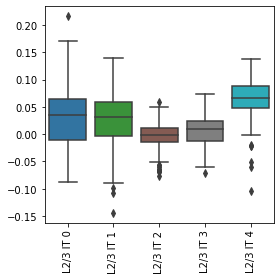

In [9]:
clm.plot_substate_performance(adata=adata_L23IT, target_cell_type='L2/3 IT')

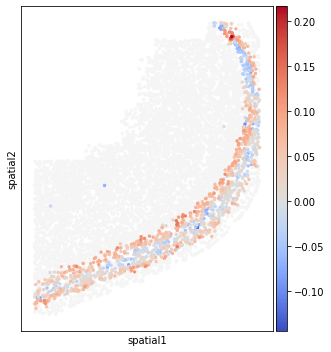

In [10]:
clm.plot_spatial_relative_performance(
    adata=adata_img, target_cell_type='L2/3 IT', figsize=(5,5), clean_view=True
)

## Supp. Fig. 5 (b,e): Attribution of molecular states to neighborhoods in the MERFISH – brain data set. 

In [11]:
adata_img, adata_L23IT = clm.target_cell_relative_performance(
    image_key='mouse1_slice162',
    baseline_model=lm,
    target_cell_type='L2/3 IT',
    undefined_type='other',
    n_neighbors=40,
    n_pcs=40,
)

100%|██████████| 6759/6759 [05:12<00:00, 21.63it/s]
         Falling back to preprocessing with `sc.pp.pca` and default params.


n cells:  946
L2/3 IT 0    226
L2/3 IT 1    209
L2/3 IT 2    193
L2/3 IT 3    191
L2/3 IT 4    127
Name: L2/3 IT substates, dtype: int64


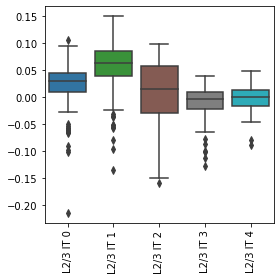

In [12]:
clm.plot_substate_performance(adata=adata_L23IT, target_cell_type='L2/3 IT')

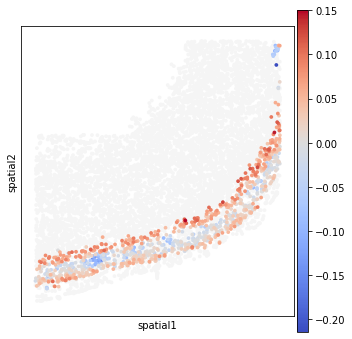

In [13]:
clm.plot_spatial_relative_performance(
    adata=adata_img, target_cell_type='L2/3 IT', figsize=(5,5)
)

# Linear model

## Supp. Fig. 3: Linear models for spatial cell state dependencies.

210520_LINEAR_BASELINE_MAX_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation
210520_LINEAR_MAX_NODES_PATIENT_1_ZHANG: loaded 9 runs with 3-fold cross validation
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values for model are ['LINEAR_MAX_NODES_PATIENT_1'], given was ['LINEAR_BASELINE_MAX_NODES_PATIENT_1']
subset was empty, available values fo

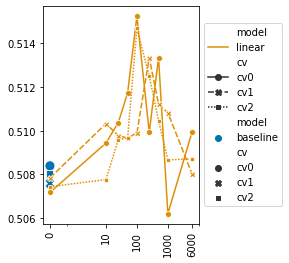

In [14]:
gs_linear = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "210520_LINEAR_BASELINE_MAX_NODES_PATIENT_1_ZHANG",
        "210520_LINEAR_MAX_NODES_PATIENT_1_ZHANG"
    ],
    lateral_resolution=1
)
gs_linear.load_gs()

gs_linear.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='linear',
    baseline_model_class='linear_baseline',
    rename_levels = [
        ("model", {
            "LINEAR_MAX_NODES_PATIENT_1": "linear",
            "LINEAR_BASELINE_MAX_NODES_PATIENT_1": "baseline",
        })
    ],
    plot_mode = 'lineplot',
    palette = {"baseline": "C0", "linear": "C1"},
    xticks=[0, 10, 100, 1000, 6000],
)

# Encoder-decoder NCEM models

## Figure 3 (b): Nonlinear models of spatial dependencies of expression states.

210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 8 runs with 3-fold cross validation
210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation


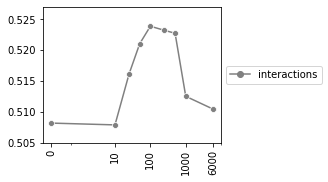

In [15]:
gs_interaction = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
        "210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_interaction.load_gs()

gs_interaction.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='interactions',
    baseline_model_class='interactions_baseline',
    rename_levels = [
        ("model", {
            "INTERACTIONS_MAX_NODES_PATIENT_1": "interactions",
            "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1": "baseline",
        })
    ],
    plot_mode = 'mean_lineplot',
    figsize=(4., 2.5),
    yaxis_limit=(0.505, 0.527),
    xticks=[ 0,  10,   100,  1000, 6000],
)

210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG: loaded 4 runs with 3-fold cross validation
210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG: loaded 112 runs with 3-fold cross validation
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_MAX_NODES_PATIENT_1'], given was ['LVMNP

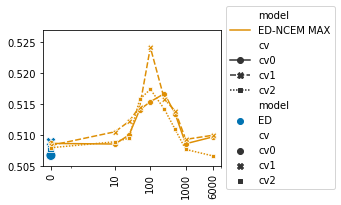

In [16]:
gs_ed_ncem_max = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG",
        "210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_ed_ncem_max.load_gs()

gs_ed_ncem_max.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_PATIENT_1": "ED",
            "CLVMNP_MAX_NODES_PATIENT_1": "ED-NCEM MAX",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.505, 0.527),
    plot_mode = 'lineplot',
    xticks=[ 0,  10,   100,  1000, 6000],
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
)

210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG: loaded 4 runs with 3-fold cross validation
210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG: loaded 62 runs with 3-fold cross validation
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_NONE_NODES_PATIENT_1']
subset was empty, available values for model are ['CLVMNP_GCN_NODES_PATIENT_1'], given was ['LVMNP_

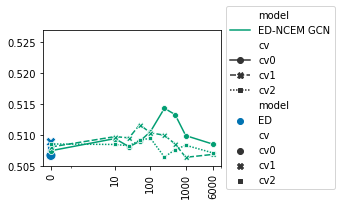

In [17]:
gs_ed_ncem_gcn = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG",
        "210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_ed_ncem_gcn.load_gs()

gs_ed_ncem_gcn.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="model",
    graph_model_class='clvmnp',
    baseline_model_class='lvmnp',
    rename_levels = [
        ("model", {
            "LVMNP_NONE_NODES_PATIENT_1": "ED",
            "CLVMNP_GCN_NODES_PATIENT_1": "ED-NCEM GCN",
        })
    ],
    figsize=(4., 2.5),
    yaxis_limit=(0.505, 0.527),
    plot_mode = 'lineplot',
    xticks=[ 0,  10,   100,  1000, 6000],
    palette = {"ED": "C0", "ED-NCEM MAX": "C1", "ED-NCEM GCN": "C2"},
)

## Figure 3 (c): Nonlinear models of spatial dependencies of expression states.

In [18]:
ed_ncem_max = ncem.interpretation.InterpreterEDncem()

ed_ncem_max.load_model(
    results_path=grid_search_dir,
    gs_id="210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG",
    cv_idx=1,
    lateral_resolution=1
)
ed_ncem_max.get_data_again(data_path=datadir + 'zhang/', data_origin="zhang")
ed_ncem_max.split_data_byidx_again(cv_idx=1)
ed_ncem_max.init_model_again()
ed_ncem_max.load_weights_again()
ed_ncem_max.reinitialize_model(changed_model_kwargs={'input_shapes': (25, 254, 7656, 1, 25, 2)})

210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG: loaded 112 runs with 3-fold cross validation
cross-validation selected: cv1
loaded model 210512_clvmnp_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecFalse_bsS_md4_tk4_n10_fsstandard_ldi3_ei6_di6_ede0_dde1_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22
Loading data from raw files
registering celldata
collecting image-wise celldata


  5%|▍         | 3/64 [00:00<00:02, 21.11it/s]

adding graph-level covariates


100%|██████████| 64/64 [00:03<00:00, 17.74it/s]


Loaded 64 images with complete data from 2 patients over 280327 cells with 254 cell features and 25 distinct celltypes.
Node_type added to categorical predictor matrix
Mean of mean node degree per images across images: 40.670611
cross-validation selected: cv1
setting reinitialized layer weights to layer weights from model 210512_clvmnp_max_nodes_patient_1_zhang_adam_lr1_agrFalse_predecFalse_bsS_md4_tk4_n10_fsstandard_ldi3_ei6_di6_ede0_dde1_dr1_l22_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22


In [19]:
saliencies = ed_ncem_max.target_cell_saliencies(
    target_cell_type='L2/3 IT',
    drop_columns=['other'],
    multicolumns=['mouse','slice'],
)

  0%|          | 0/64 [00:00<?, ?it/s]

ATTENTION: specifying reinit_n_eval will change class argument n_eval_nodes_per_graph from 10 to 1


100%|██████████| 64/64 [05:54<00:00,  5.54s/it]


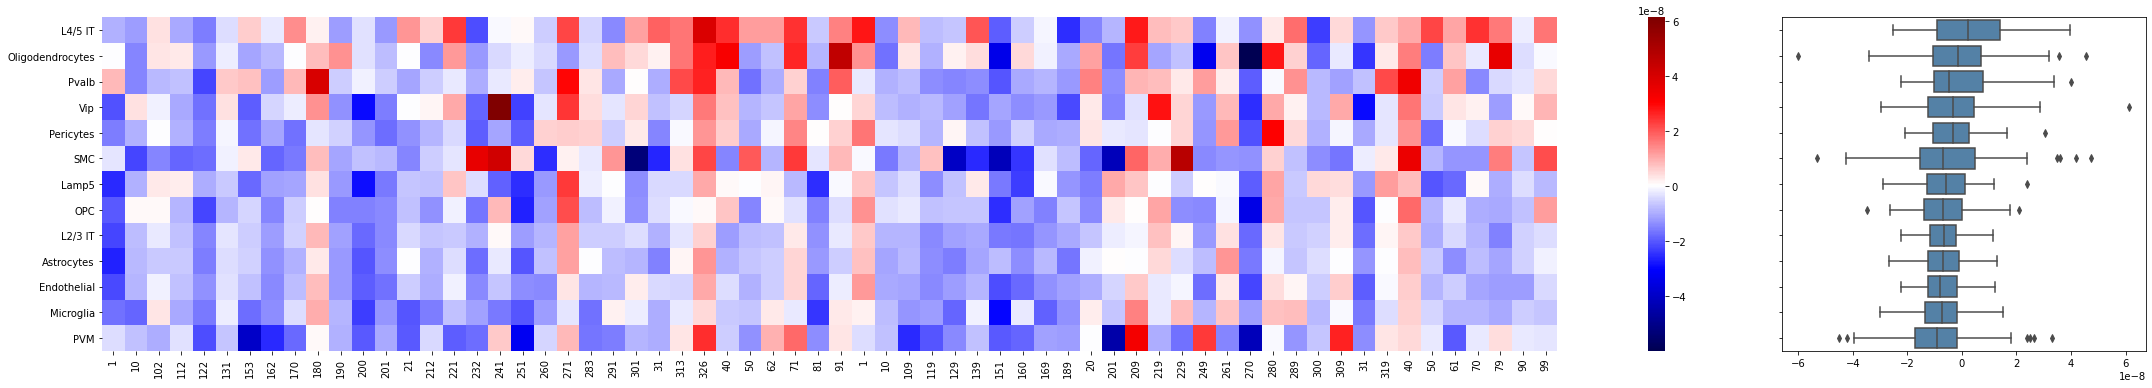

In [20]:
saliencies = saliencies.assign(
    m=saliencies.mean(axis=1, skipna=False)
).sort_values('m', ascending=False).drop('m', axis=1)

ed_ncem_max.plot_target_cell_saliencies(
    saliencies=saliencies[:13],
    figsize=(30,5.5)
)

## Supp. Fig. 11 (a): Length scales of dependencies for different target cell-types.

210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG: loaded 4 runs with 3-fold cross validation
210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG: loaded 112 runs with 3-fold cross validation
210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG: loaded 62 runs with 3-fold cross validation


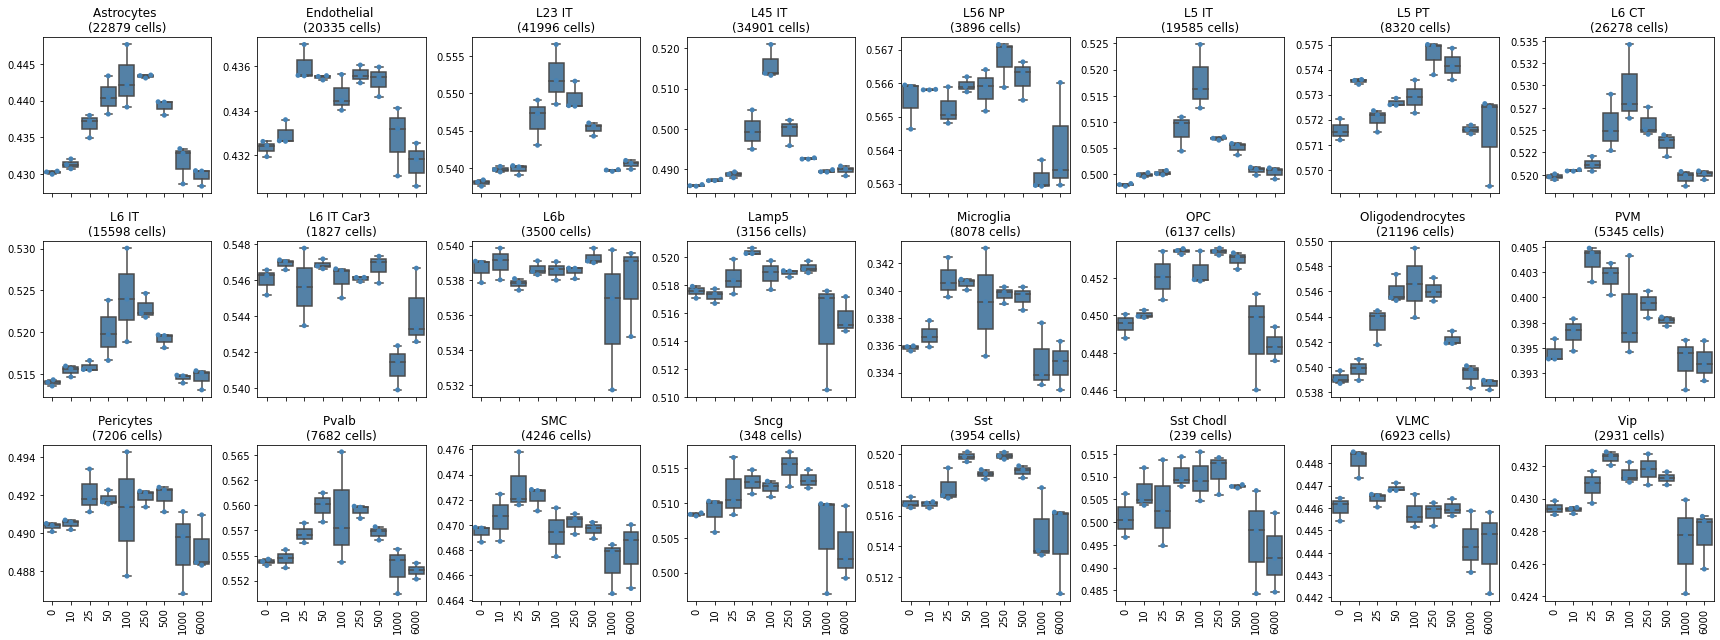

In [21]:
gs_ed_ncem = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "210512_LVMNP_NONE_NODES_PATIENT_1_ZHANG",
        "210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG",
        "210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG",
    ],
    lateral_resolution=1
)
gs_ed_ncem.load_gs()

gs_ed_ncem.load_target_cell_evaluation()
gs_ed_ncem.target_cell_table = gs_ed_ncem.target_cell_table[gs_ed_ncem.target_cell_table['target_cell'] != 'other']

gs_ed_ncem.plot_target_cell_evaluation(
    metric_show="r_squared_linreg",
    metric_select="r_squared_linreg",
    param_x="um_radius",
)

## Paired t-test between baseline model and best spatial model

In [22]:
test_id_ed = gs_ed_ncem.get_best_model_id(
    subset_hyperparameters=[("model", "LVMNP_NONE_NODES_PATIENT_1")],
)
ed_test_r2 = np.array(
    gs_ed_ncem.summary_table[gs_ed_ncem.summary_table["run_id"] ==test_id_ed]['test_r_squared_linreg']
)
test_id_ed_ncem_max = gs_ed_ncem.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_MAX_NODES_PATIENT_1")],
)
ed_ncem_max_test_r2 = np.array(
    gs_ed_ncem.summary_table[gs_ed_ncem.summary_table["run_id"] ==test_id_ed_ncem_max]['test_r_squared_linreg']
)

test_id_ed_ncem_gcn = gs_ed_ncem.get_best_model_id(
    subset_hyperparameters=[("model", "CLVMNP_GCN_NODES_PATIENT_1")],
)
ed_ncem_gcn_test_r2 = np.array(
    gs_ed_ncem.summary_table[gs_ed_ncem.summary_table["run_id"] ==test_id_ed_ncem_gcn]['test_r_squared_linreg']
)

print('ED-NCEM MAX:', ttest_rel(ed_ncem_max_test_r2, ed_test_r2))
print('ED-NCEM GCN:', ttest_rel(ed_ncem_gcn_test_r2, ed_test_r2))

ED-NCEM MAX: Ttest_relResult(statistic=5.355240979482038, pvalue=0.03314531105437973)
ED-NCEM GCN: Ttest_relResult(statistic=0.9012329859274131, pvalue=0.46258180799729487)


## Unpaired t-test between interaction model and best spatial model

In [23]:
test_id_interaction = gs_interaction.get_best_model_id(
    subset_hyperparameters=[("model", "INTERACTIONS_MAX_NODES_PATIENT_1")]
)
interaction_test_r2 = np.array(
    gs_interaction.summary_table[gs_interaction.summary_table["run_id"]==test_id_interaction]['test_r_squared_linreg']
)
print('ED-NCEM MAX:', ttest_ind(ed_ncem_max_test_r2, interaction_test_r2))
print('ED-NCEM GCN:', ttest_ind(ed_ncem_gcn_test_r2, interaction_test_r2))

ED-NCEM MAX: Ttest_indResult(statistic=-1.3252924337746408, pvalue=0.2557043728365311)
ED-NCEM GCN: Ttest_indResult(statistic=-3.974839087655377, pvalue=0.016471947026990903)


# Conditional variational autoencoder NCEM
## Supp. Fig. 12: CVAE–NCEMs on MERFISH – brain data.

In [24]:
gs_overview = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG",
        "210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
        "210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG",
        "210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG",
        "210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG",
        "210519b_VAE_NONE_TARGET_CELL_PATIENT_1_ZHANG",
        "210519_CVAE_MAX_TARGET_CELL_PATIENT_1_ZHANG",
        "210521_CVAE_MAX_TARGET_CELL_PATIENT_1_ZHANG" 
    ],
    lateral_resolution=1.
)
gs_overview.load_gs()

210511_INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation
210511_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 8 runs with 3-fold cross validation
210512_INTERACTIONS_MAX_NODES_PATIENT_1_ZHANG: loaded 1 runs with 3-fold cross validation
210512_CLVMNP_MAX_NODES_PATIENT_1_ZHANG: loaded 112 runs with 3-fold cross validation
210516_CLVMNP_GCN_NODES_PATIENT_1_ZHANG: loaded 62 runs with 3-fold cross validation
210519b_VAE_NONE_TARGET_CELL_PATIENT_1_ZHANG: loaded 12 runs with 3-fold cross validation
210519_CVAE_MAX_TARGET_CELL_PATIENT_1_ZHANG: loaded 223 runs with 3-fold cross validation
210521_CVAE_MAX_TARGET_CELL_PATIENT_1_ZHANG: loaded 48 runs with 3-fold cross validation


No handles with labels found to put in legend.


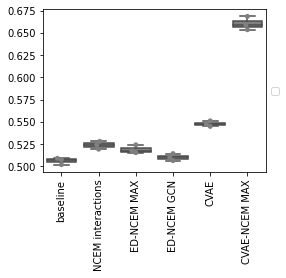

In [25]:
gs_overview.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="model",
    param_hue="data_set",
    graph_model_class='',
    baseline_model_class='',
    rotate_xticks=True,
    rename_levels = [
        ("model", {
            "LINEAR_MAX_NODES_PATIENT_1": "NCEM linear",
            "INTERACTIONS_MAX_NODES_PATIENT_1": "NCEM interactions",
            "CLVMNP_MAX_NODES_PATIENT_1": "ED-NCEM MAX",
            "CLVMNP_GCN_NODES_PATIENT_1": "ED-NCEM GCN",
            "CVAE_MAX_TARGET_CELL_PATIENT_1": "CVAE-NCEM MAX",
            "LINEAR_BASELINE_MAX_NODES_PATIENT_1": "baseline",
            "INTERACTIONS_BASELINE_NONE_NODES_PATIENT_1": "baseline",
            "LVMNP_NONE_NODES_PATIENT_1": "ED",
            "VAE_NONE_TARGET_CELL_PATIENT_1": "CVAE",
        })
    ],
    figsize=(5, 3),
    color='grey'
)

In [26]:
gs_vae = ncem.train.GridSearchContainer(
    grid_search_dir, 
    gs_ids=[
        "210519b_VAE_NONE_TARGET_CELL_PATIENT_1_ZHANG",
        "210519_CVAE_MAX_TARGET_CELL_PATIENT_1_ZHANG",
        "210527_CVAE_MAX_TARGET_CELL_PATIENT_1_ZHANG"
    ],
    lateral_resolution=1.
)
gs_vae.load_gs(add_posterior_sampling_model=True)

# subsetting to only posterior sampling evaluation
gs_vae.summary_table = gs_vae.summary_table[(gs_vae.summary_table['posterior_sampling_eval'] == True)]

210519b_VAE_NONE_TARGET_CELL_PATIENT_1_ZHANG: loaded 12 runs with 3-fold cross validation
210519b_VAE_NONE_TARGET_CELL_PATIENT_1_ZHANG: loaded posterior sampling as seperate model (12 runs with 3-fold cross validation)
210519_CVAE_MAX_TARGET_CELL_PATIENT_1_ZHANG: loaded 223 runs with 3-fold cross validation
210519_CVAE_MAX_TARGET_CELL_PATIENT_1_ZHANG: loaded posterior sampling as seperate model (223 runs with 3-fold cross validation)
210527_CVAE_MAX_TARGET_CELL_PATIENT_1_ZHANG: loaded 16 runs with 3-fold cross validation
210527_CVAE_MAX_TARGET_CELL_PATIENT_1_ZHANG: loaded posterior sampling as seperate model (16 runs with 3-fold cross validation)


subset was empty, available values for aggressive are [True], given was [False]
subset was empty, available values for aggressive are [True], given was [False]
subset was empty, available values for aggressive are [True], given was [False]
subset was empty, available values for aggressive are [True], given was [False]
subset was empty, available values for aggressive are [True], given was [False]
subset was empty, available values for aggressive are [True], given was [False]
subset was empty, available values for aggressive are [True], given was [False]


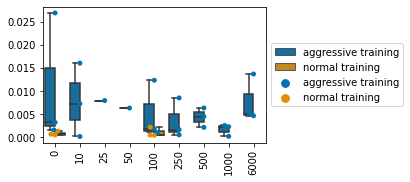

In [27]:
gs_vae.plot_best_model_by_hyperparam(
    partition_show="test",
    metric_show="r_squared_linreg",
    partition_select="val",
    metric_select="r_squared_linreg",
    param_x="um_radius",
    param_hue="aggressive",
    graph_model_class='cvae',
    baseline_model_class='vae',
    rename_levels = [
        ("aggressive", {
            True: "aggressive training",
            False: "normal training",
        })
    ],
    figsize=(5, 2.5),
    plot_mode = 'boxplot',
)

In [28]:
cvae = ncem.interpretation.InterpreterCVAEncem()

cvae.load_model(
    results_path=grid_search_dir,
    gs_id="210521_CVAE_MAX_TARGET_CELL_PATIENT_1_ZHANG",
    cv_idx=1,
    model_id='210521_cvae_max_target_cell_patient_1_zhang_adam_lr1_agrTrue_predecTrue_bsS_md4_tk4_n10_fsstandard_ldi2_ei5_di6_ede0_dde0_dr1_l23_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22_L23IT',
)
cvae.get_data_again(data_path=datadir + "zhang/", data_origin="zhang")
cvae.split_data_byidx_again(cv_idx=1)
cvae.init_model_again()
cvae.load_weights_again()
cvae.reinitialize_model(changed_model_kwargs={'input_shapes': (25, 254, 7656, 1, 25, 2)})

210521_CVAE_MAX_TARGET_CELL_PATIENT_1_ZHANG: loaded 48 runs with 3-fold cross validation
cross-validation selected: cv1
loaded model 210521_cvae_max_target_cell_patient_1_zhang_adam_lr1_agrTrue_predecTrue_bsS_md4_tk4_n10_fsstandard_ldi2_ei5_di6_ede0_dde0_dr1_l23_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22_L23IT
Loading data from raw files
registering celldata
collecting image-wise celldata


  5%|▍         | 3/64 [00:00<00:03, 19.57it/s]

adding graph-level covariates


100%|██████████| 64/64 [00:03<00:00, 16.94it/s]


Loaded 64 images with complete data from 2 patients over 280327 cells with 254 cell features and 25 distinct celltypes.
Node_type added to categorical predictor matrix
Mean of mean node degree per images across images: 40.670611
cross-validation selected: cv1

Two checkpoint references resolved to different objects (<ncem.models.layers.layer_stacks_lvm.CondEncoder object at 0x7f1406d4a250> and <ncem.models.layers.layer_stacks_lvm.CondDecoder object at 0x7f1406ccf580>).

Two checkpoint references resolved to different objects (<ncem.models.layers.output_layers.GaussianConstDispOutput object at 0x7f1406d781f0> and <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f1406e35a90>).
setting reinitialized layer weights to layer weights from model 210521_cvae_max_target_cell_patient_1_zhang_adam_lr1_agrTrue_predecTrue_bsS_md4_tk4_n10_fsstandard_ldi2_ei5_di6_ede0_dde0_dr1_l23_l11_COND_cde1_cbTrue_cdi0_cdr1_cnh1_cl22_L23IT


In [29]:
filter_titles = [
    'Oligodendrocytes',
    'Pvalb',
    'L4/5 IT',
    'Sncg',
    'Lamp5',
    'Vip',
    'L5/6 NP',
    'VLMC',
    'L6 IT Car3',
    'Microglia',
    'Endothelial',
    'L5 IT',
    'Sst',
    'OPC',
    'Astrocytes',
    'L2/3 IT',
    'Sst Chodl',
    'Pericytes',
    'SMC',
    'PVM'
]

adata, log_pval, fold_change = cvae.compute_latent_space_cluster_enrichment(
    image_key='mouse1_slice153',
    target_cell_type='L2/3 IT',
    n_neighbors=80,
    n_pcs=None,
    filter_titles=filter_titles
)

ATTENTION: specifying reinit_n_eval will change class argument n_eval_nodes_per_graph from 10 to 1
n cells:  1204
L2/3 IT 0    323
L2/3 IT 1    315
L2/3 IT 2    250
L2/3 IT 3    170
L2/3 IT 4    146
Name: substates, dtype: int64


... storing 'target_cell' as categorical


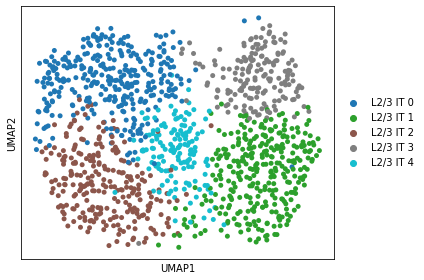

In [30]:
plt.ioff()
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(6,4 ),)
sc.pl.umap(adata, color=['substates'], ax=ax, show=False, palette='tab10', title='')
plt.tight_layout()
plt.show()

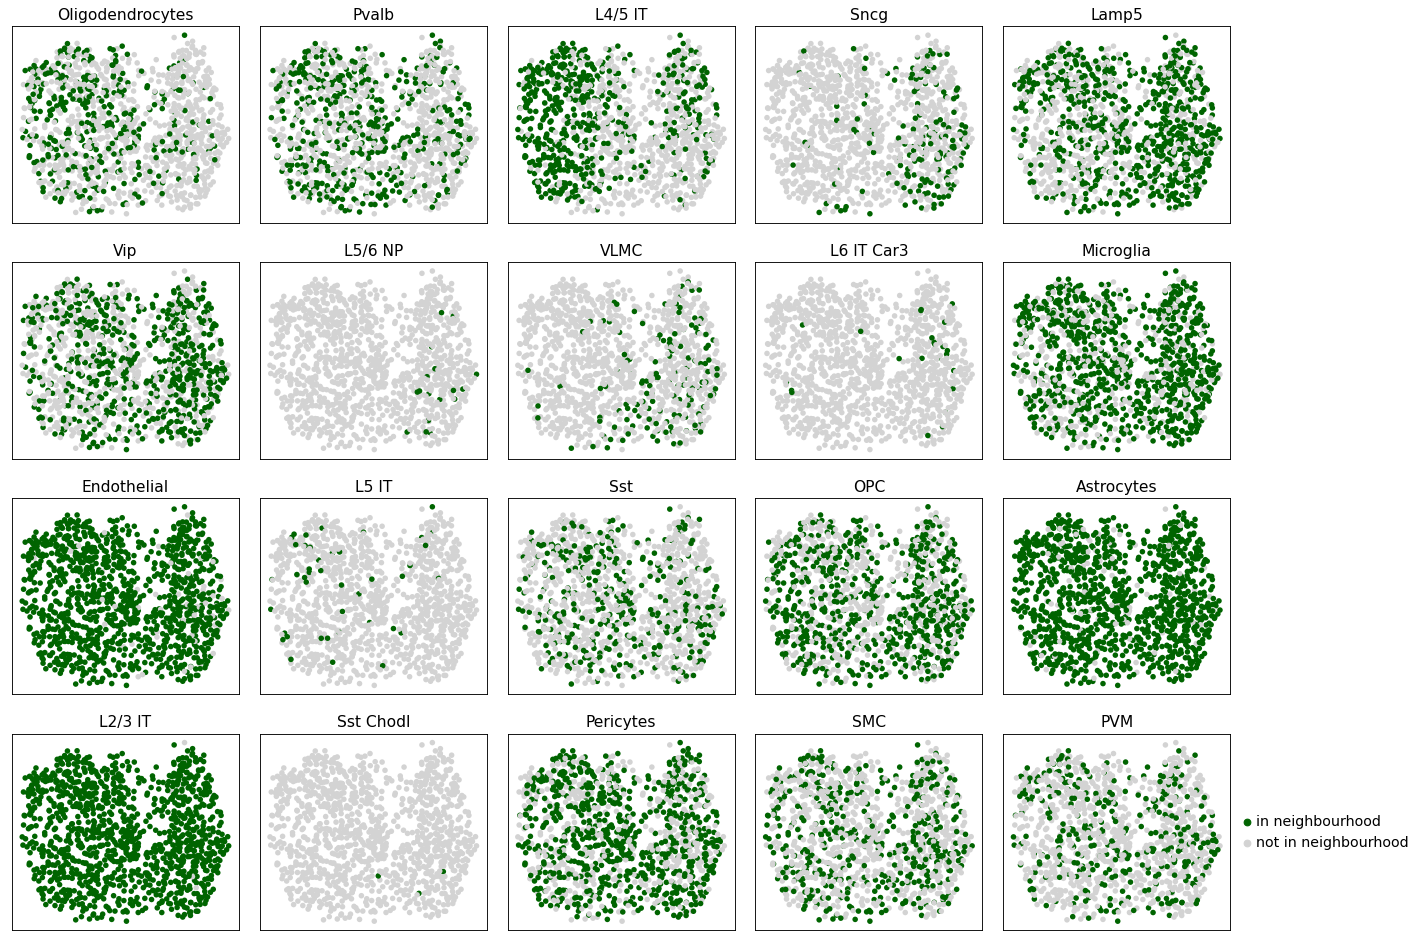

In [34]:
for i, x in enumerate(filter_titles):
    adata.uns[f"{x}_colors"] = ['darkgreen', 'lightgrey']
plt.ioff()
fig, axs = plt.subplots(nrows=4, ncols=5, figsize=(6 * 3, 3 * 4), )
N = len(filter_titles)
axs = axs.flat
for ax in axs[N:]:
    ax.remove()
ax = axs[:N]

for i, x in enumerate(filter_titles[:-1]):
    sc.pl.umap(
        adata,
        color=x,
        title=x,
        show=False,
        legend_loc='None',
        ax=ax[i]
    )
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
sc.pl.umap(
    adata,
    color=filter_titles[-1],
    title=filter_titles[-1],
    show=False,
    ax=ax[N-1]
)
ax[N-1].set_xlabel('')
ax[N-1].set_ylabel('')
# Save, show and return figure.
plt.tight_layout()
plt.show()


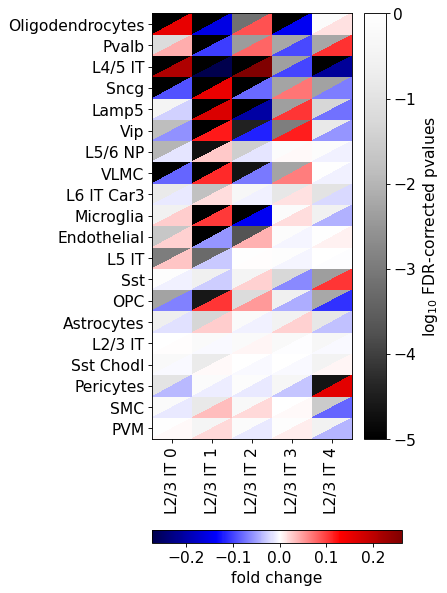

In [35]:
cvae.data.cluster_enrichment(
    pvalues=log_pval, 
    fold_change=fold_change,
)